# Importing Libiraries

In [1]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import plotly.express as px # type: ignore
from sklearn.impute import SimpleImputer # type: ignore

# warnings
import warnings
warnings.filterwarnings("ignore")

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Show all columns
pd.set_option('display.max_columns',None)

# Loading the data

In [2]:
data = pd.read_csv(r"datadashboard.csv")
copy = data.copy()

# Exploring the data 

In [55]:
# Show the head of the data 

data.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [20]:
# A quick information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Notes:
1. Some column names contain extra spaces (e.g., " thinness 1-19 years", " thinness 5-9 years").
2. Population should be integer, but it contains floats.
3. Several columns have missing values.

In [5]:
# Rename to delet extra spaces

data.columns = data.columns.str.strip()

In [22]:
# Convert Population to integer, handling NaNs
data["Population"] = data["Population"].fillna(0).astype(int)

# Replace 0 values with NaN
data["Population"] = data["Population"].replace(0, np.nan)

In [23]:
# Checking for Null Values

data.isnull().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.221920
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [24]:
# check if duplicated in data

data.duplicated().any()

False

In [62]:
# see quick info of numeric values

data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Notes:
1. infant deaths, under-five deaths and Measles should be a numper / per 1000 population the should be smaller than 1000
2. "percentage expenditure" column should be a numper uder 100.
   

In [7]:
data[data["percentage expenditure"] > 100]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
113,Australia,2014,Developed,82.7,6.0,1.0,9.71,107.693630,91.0,340.000,66.1,1.0,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1.0,9.87,117.348538,91.0,158.000,65.5,1.0,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1.0,10.03,117.149986,91.0,199.000,65.0,1.0,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1.0,10.30,109.862653,92.0,190.000,64.4,1.0,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
738,Denmark,2014,Developed,84.0,73.0,0.0,9.64,104.687629,NaN,27.000,58.4,0.0,94.0,1.80,94.0,0.1,62425.53920,5643475.0,1.1,0.9,0.926,19.2
739,Denmark,2013,Developed,81.0,75.0,0.0,9.50,102.617630,NaN,17.000,58.1,0.0,94.0,11.25,94.0,0.1,61191.19263,5614932.0,1.1,0.9,0.924,18.7
741,Denmark,2011,Developed,79.7,79.0,0.0,10.47,102.511087,NaN,84.000,57.4,0.0,91.0,1.87,91.0,0.1,61753.66700,557572.0,1.1,0.9,0.910,16.9
744,Denmark,2008,Developed,78.8,88.0,0.0,10.70,107.611821,NaN,14.000,56.3,0.0,88.0,1.18,88.0,0.1,64322.66640,5493621.0,1.1,0.9,0.906,16.8
1178,Iceland,2007,Developed,81.3,59.0,0.0,7.53,120.429737,NaN,0.000,57.8,0.0,97.0,8.75,97.0,0.1,68348.31817,311566.0,0.9,0.9,0.887,18.2
1180,Iceland,2005,Developed,81.0,62.0,0.0,7.05,106.312038,NaN,0.000,56.9,0.0,95.0,9.21,95.0,0.1,56249.75550,296734.0,0.9,0.9,0.879,17.9


In [6]:
# List of columns to check
columns_to_check = ["infant deaths", "under-five deaths", "Measles"]


# Replace values greater than 1000 by scaling them down per 1000 population
for col in columns_to_check:
    data[col] = data[col].apply(lambda x: x / 1000 if x > 1000 else x)

# # Replace values greater than 100 by scaling them down per 100 in "percentage expenditure" column 
data["percentage expenditure"]= data["percentage expenditure"].apply(lambda x: x / 100 if x > 100 else x)

In [28]:
# see quick info of category values 

data.describe(include = object)

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [ ]:
# Show the distribution of the data 

data.hist(figsize=(30, 30))

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'under-five deaths'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'thinness  1-19 years'}>,
        <Axes: title={'center': 'thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Schoo

In [ ]:
# Numerical columns 
numeric_cols = data.select_dtypes(include= "number").columns

# Show the skewness of the data 
original_skewness=data[numeric_cols].skew()
original_skewness

In [31]:
# difine the skewness type 
positive_skewed = original_skewness[original_skewness>.5].index
negative_skewed = original_skewness[original_skewness< -.5].index
symmetric_distributed = ["BMI"]

In [32]:
positive_skewed

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Measles', 'under-five deaths', 'Total expenditure', 'HIV/AIDS', 'GDP',
       'Population', 'thinness  1-19 years', 'thinness 5-9 years'],
      dtype='object')

In [33]:
data[positive_skewed].isnull().sum()

Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Measles                     0
under-five deaths           0
Total expenditure         226
HIV/AIDS                    0
GDP                       448
Population                652
thinness  1-19 years       34
thinness 5-9 years         34
dtype: int64

In [34]:
data[negative_skewed].isnull().sum()

Life expectancy                     10
Hepatitis B                        553
Polio                               19
Diphtheria                          19
Income composition of resources    167
Schooling                          163
dtype: int64

### Now we can handle the missing value acoording to the skewness type

In [35]:
# handel missing values 

imputer1 = SimpleImputer(strategy="median")
imputer2 = SimpleImputer(strategy="mean")
data[positive_skewed] = imputer1.fit_transform(data[positive_skewed])
data[negative_skewed] = imputer1.fit_transform(data[negative_skewed])
data[symmetric_distributed] = imputer2.fit_transform(data[symmetric_distributed])
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

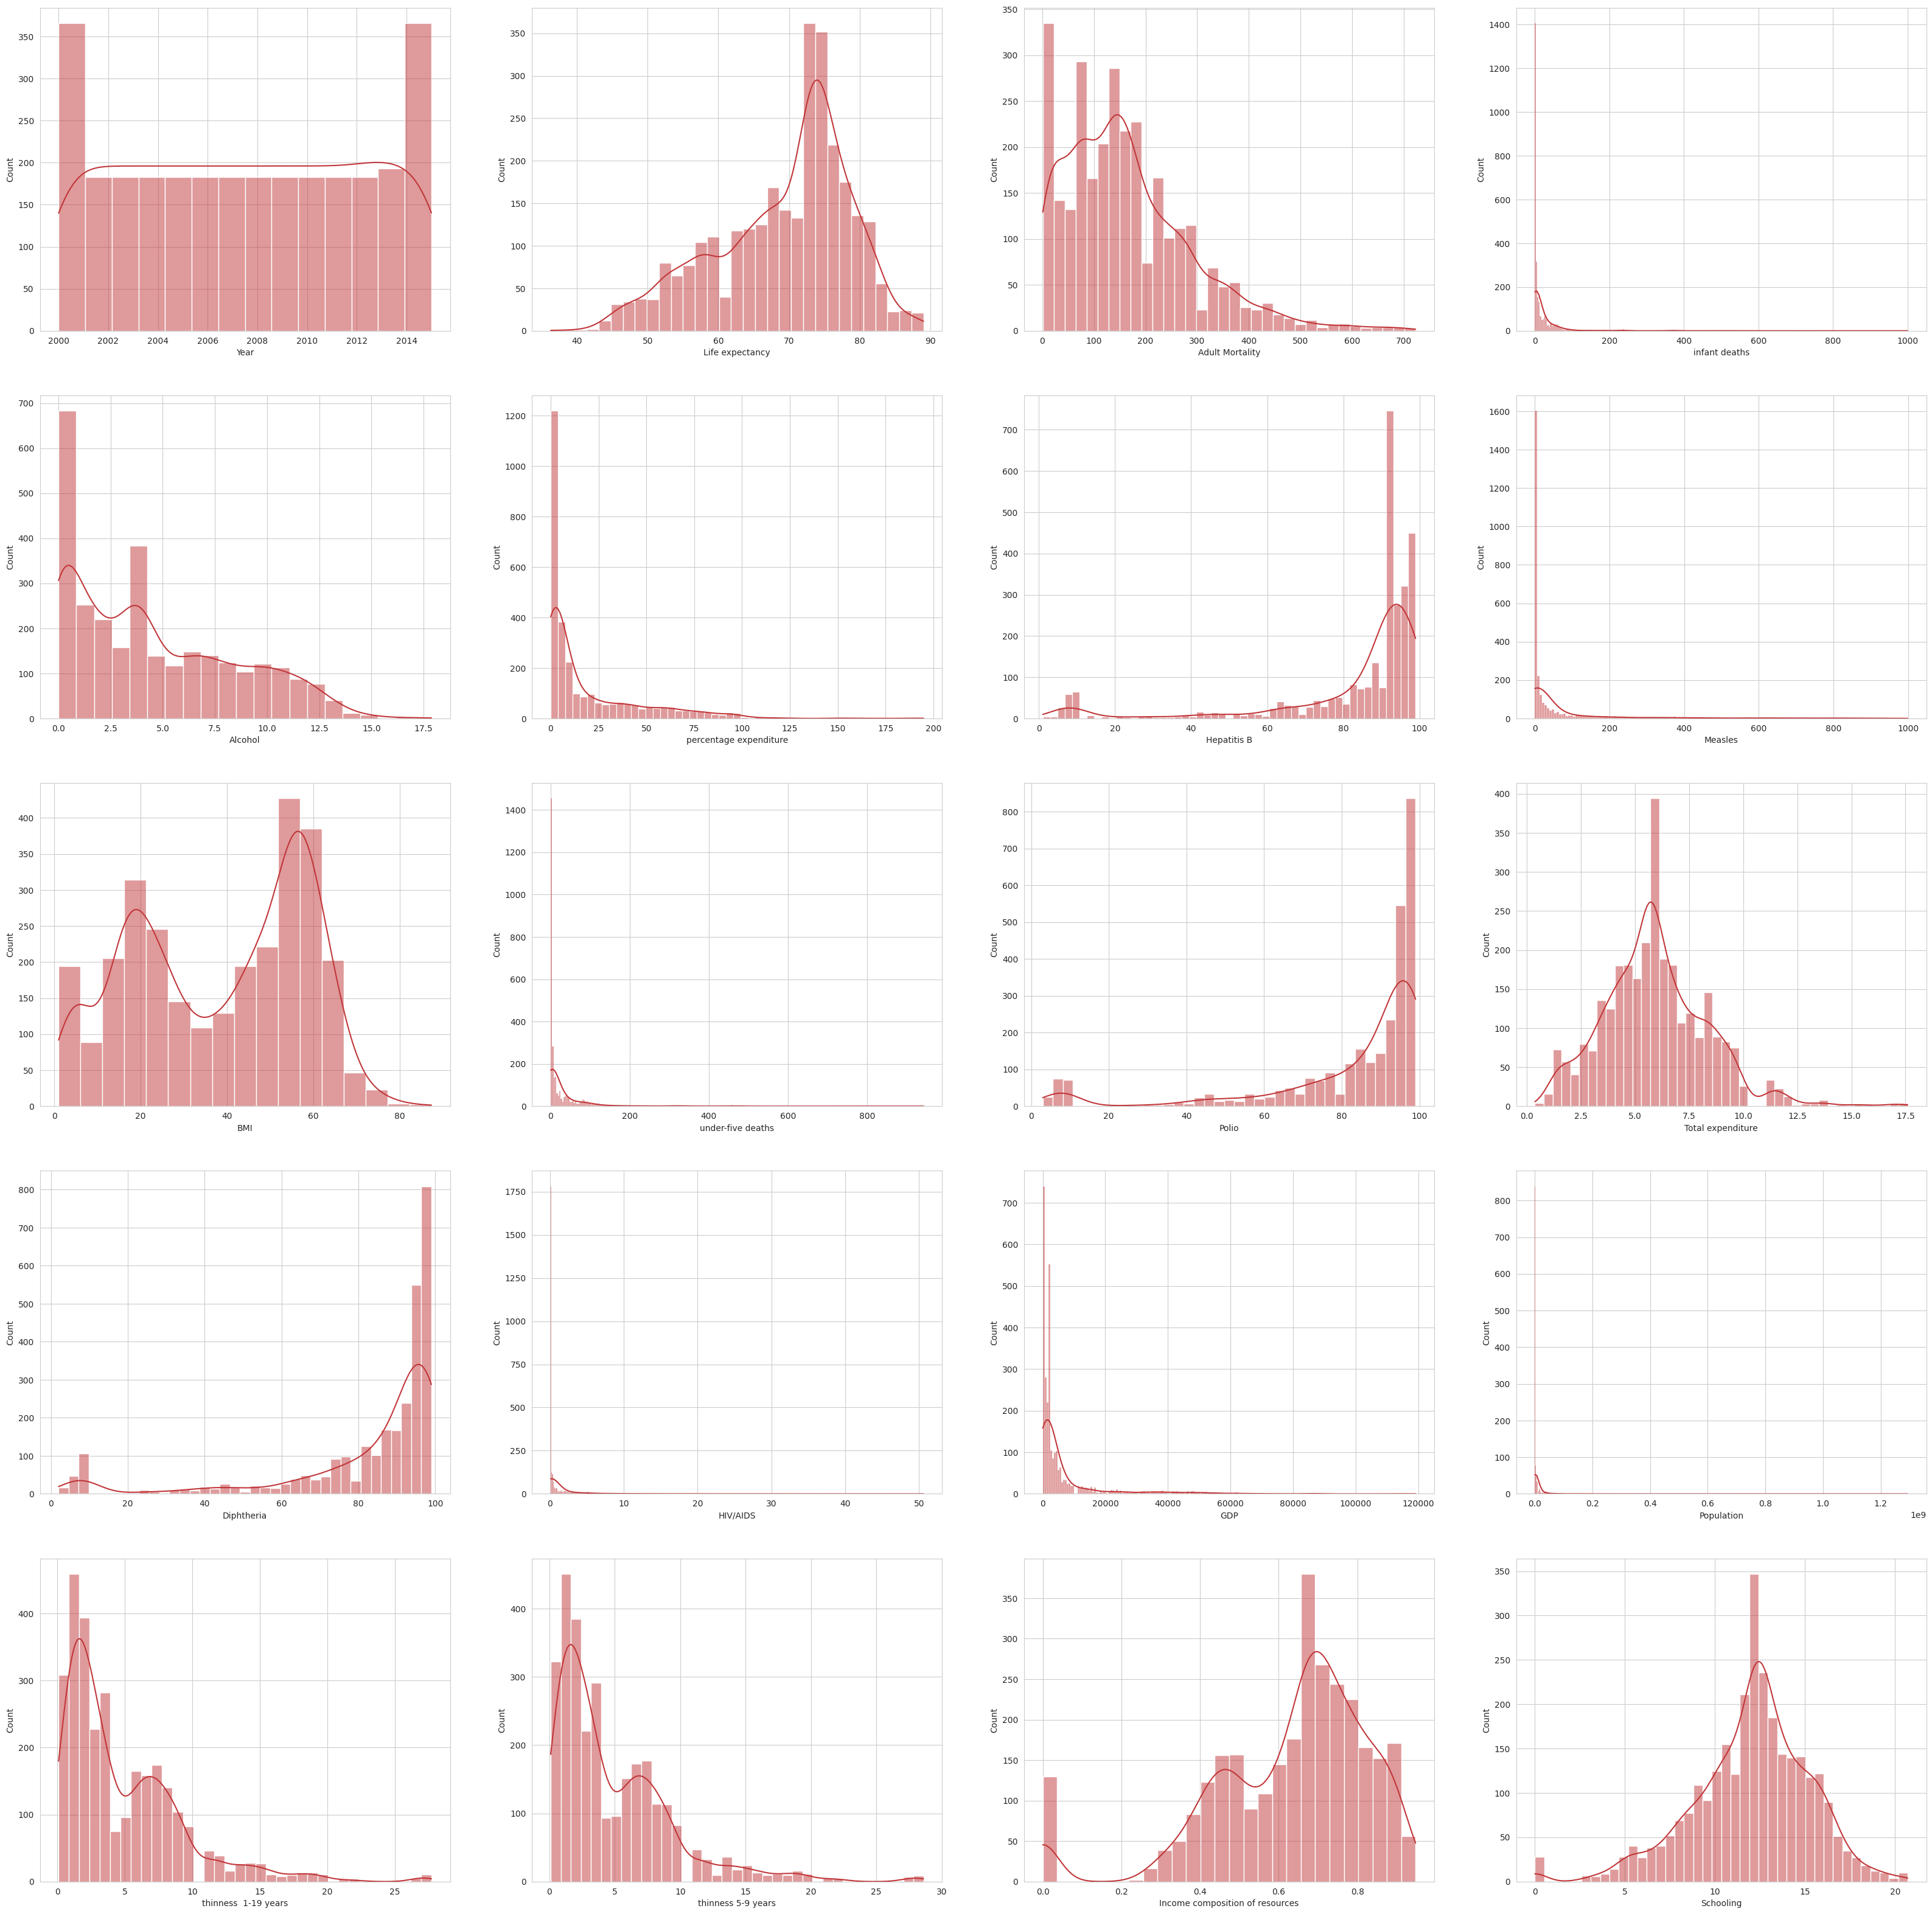

In [36]:
fig = plt.figure(figsize= (40, 40))
c = 1
for col in numeric_cols:
    plt.subplot(5, 4,c)
    g = sns.histplot(data[col], kde=True)
    g.set(xlabel = col)
    c = c + 1

In [37]:
# Dictionary mapping countries to their respective regions (continents)
country_to_continent = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Bolivia (Plurinational State of)': 'South America', 
    'South Sudan': 'Africa', 'Finland': 'Europe', 'Cyprus': 'Europe', 'Uruguay': 'South America', 'Belize': 'North America',
    'United Republic of Tanzania': 'Africa', 'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia',
    'Bahrain': 'Asia', 'Ukraine': 'Europe', 'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania',
    'Cuba': 'North America', 'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa', 'Spain': 'Europe',
    'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America', 'Sao Tome and Principe': 'Africa',
    'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa',
    'Antigua and Barbuda': 'North America', 'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe',
    'Nigeria': 'Africa', 'Benin': 'Africa', 'The former Yugoslav republic of Macedonia': 'Europe',
    'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa', 'Trinidad and Tobago': 'North America', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Lithuania': 'Europe', 'Sudan': 'Africa', 'Costa Rica': 'North America',
    'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia', 'Sri Lanka': 'Asia',
    'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America', 'Panama': 'North America',
    'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia', 'Haiti': 'North America', 'Iraq': 'Asia',
    'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia', 'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America',
    'Maldives': 'Asia', 'Gabon': 'Africa', 'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa',
    'Niue': 'Oceania', 'Latvia': 'Europe', 'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa',
    'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania', 'Argentina': 'South America', 'Cambodia': 'Asia',
    'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia', 'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America',
    'Thailand': 'Asia', 'Bangladesh': 'Asia', 'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa',
    'Czechia': 'Europe', 'Niger': 'Africa', 'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia',
    'Jordan': 'Asia', 'Russian Federation': 'Europe', 'Syrian Arab Republic': 'Asia',
    'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania',
    'Palau': 'Oceania', 'Monaco': 'Europe', 'Dominica': 'North America'
}
# Add the 'Region' column based on the 'Country' column
def creat_Continent_col(df, mapping=country_to_continent):
    data["Continent"] =data['Country'].map(country_to_continent) 

#Apllying on copy
creat_Continent_col(data)

In [38]:
fig=px.histogram(data,x='Life expectancy')
fig.show()


# Answering Questions Via Visualization
# 1️⃣ Life Expectancy Trends & Patterns

### 1️⃣ How has life expectancy changed globally over the years?

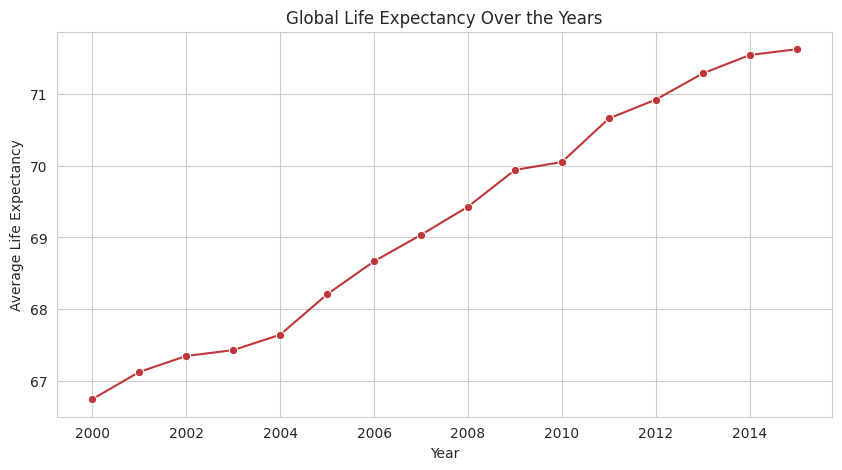

In [39]:
# Group data by year and calculate average life expectancy
global_life_expectancy = data.groupby("Year")["Life expectancy"].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=global_life_expectancy.index, y=global_life_expectancy.values, marker="o")
plt.title("Global Life Expectancy Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.grid(True)
plt.show()

### 2️⃣ Which countries have the highest and lowest life expectancy, and why?

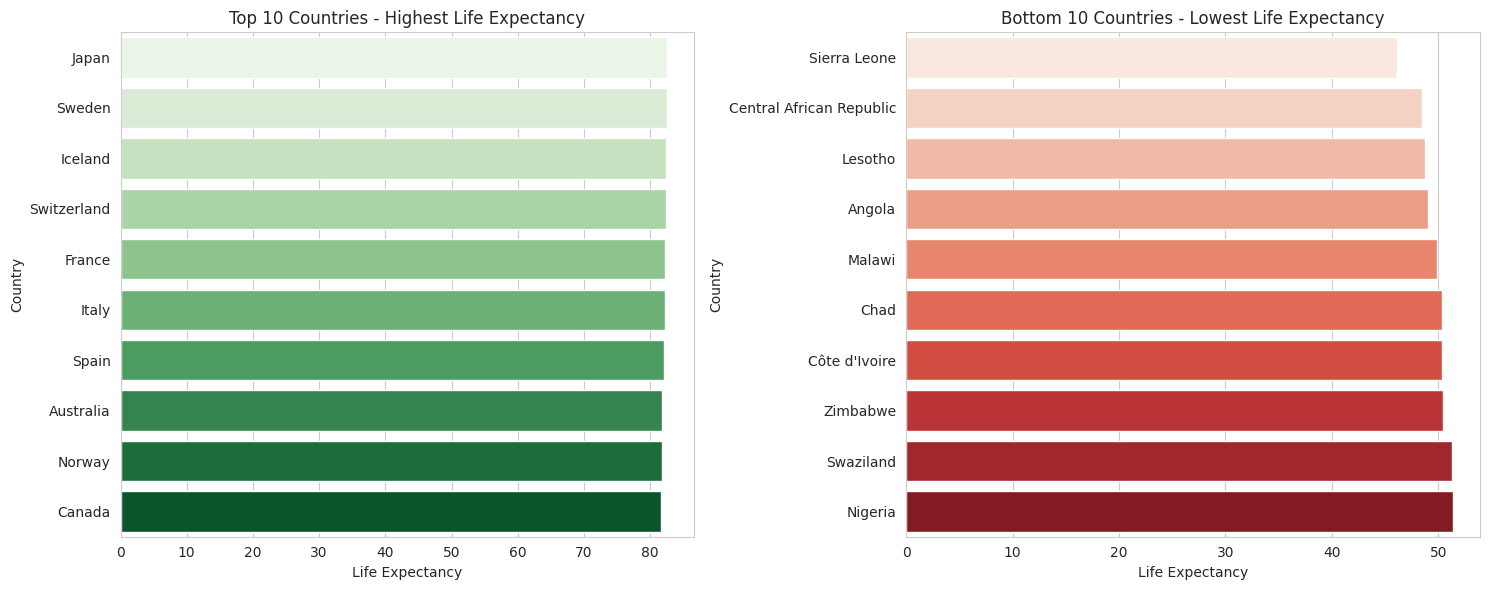

In [40]:
# Get the highest and lowest life expectancy countries
top_countries = data.groupby("Country")["Life expectancy"].mean().nlargest(10)
bottom_countries = data.groupby("Country")["Life expectancy"].mean().nsmallest(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(y=top_countries.index, x=top_countries.values, ax=ax[0], palette="Greens")
ax[0].set_title("Top 10 Countries - Highest Life Expectancy")
ax[0].set_xlabel("Life Expectancy")

sns.barplot(y=bottom_countries.index, x=bottom_countries.values, ax=ax[1], palette="Reds")
ax[1].set_title("Bottom 10 Countries - Lowest Life Expectancy")
ax[1].set_xlabel("Life Expectancy")

plt.tight_layout()
plt.show()


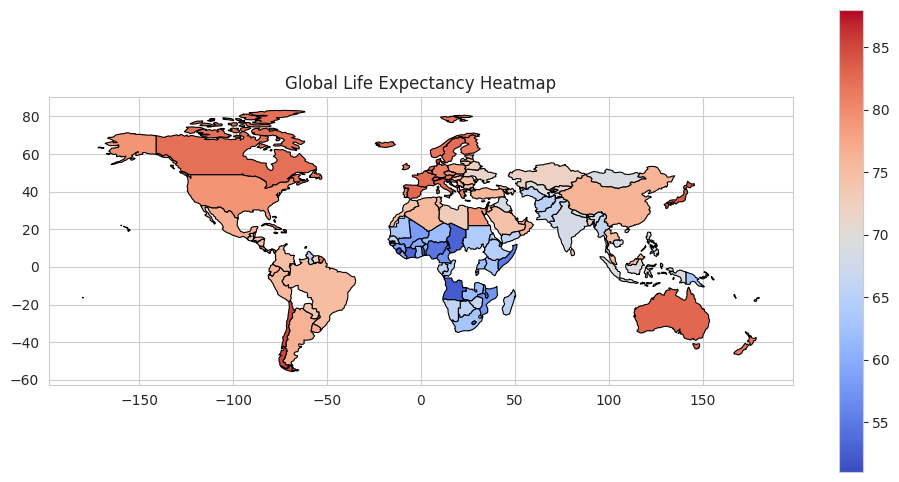

In [ ]:
import geopandas as gpd # type: ignore

# Load world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge with life expectancy data (use latest year)
latest_data = data[data["Year"] == data["Year"].max()]
world = world.merge(latest_data, left_on="name", right_on="Country", how="left")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
world.plot(column="Life expectancy", cmap="coolwarm", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
plt.title("Global Life Expectancy Heatmap")
plt.show()


### 3️⃣ Are there regional disparities in life expectancy (developed vs. developing)?

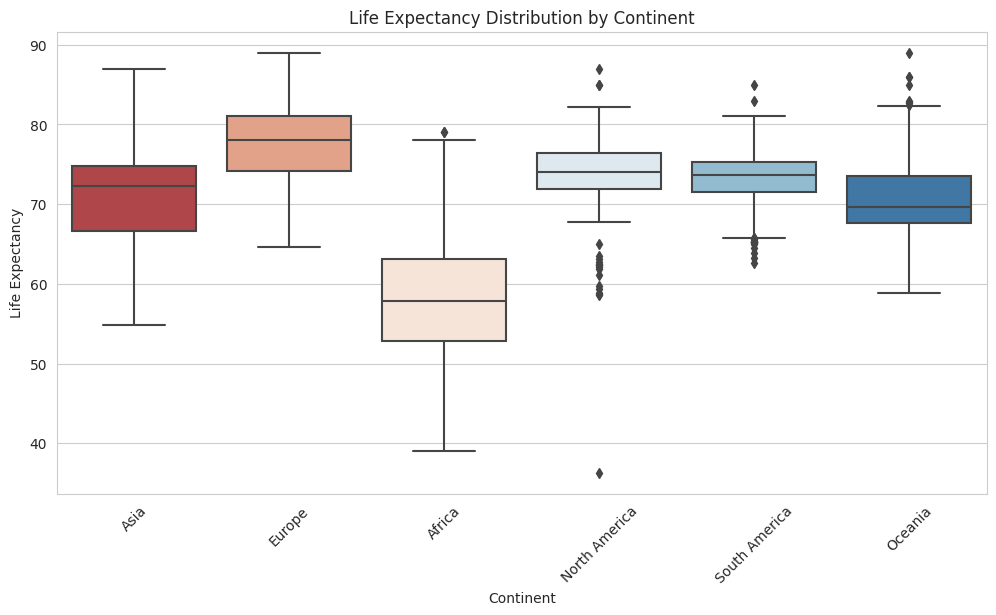

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Continent", y="Life expectancy", data=data)
plt.title("Life Expectancy Distribution by Continent")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=45)
plt.show()


# 2️⃣ Socioeconomic Factors Impacting Life Expectancy

### 1️⃣ How does GDP per capita correlate with life expectancy?

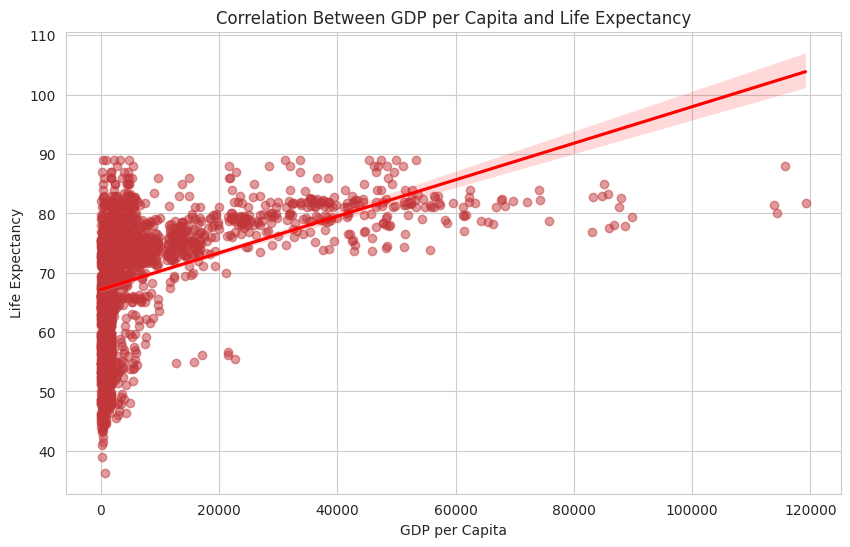

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(x="GDP", y="Life expectancy", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Correlation Between GDP per Capita and Life Expectancy")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


### 2️⃣ Does education level affect life expectancy?

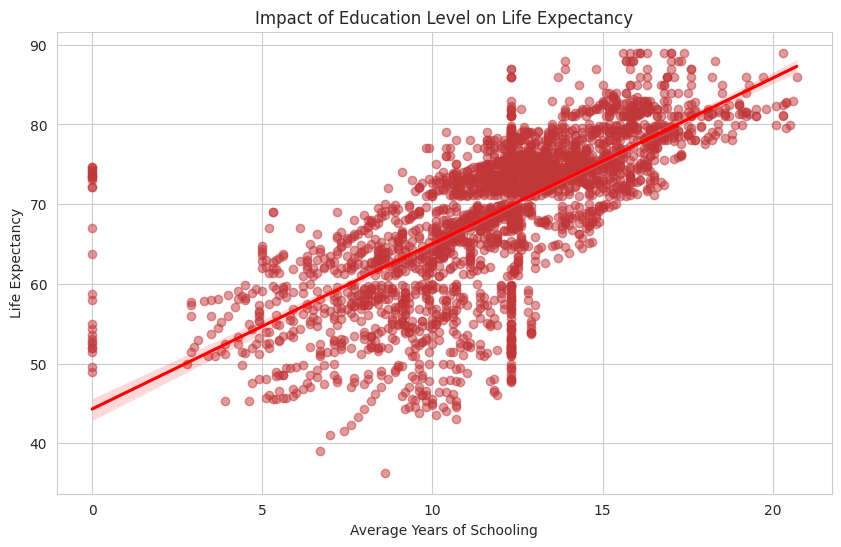

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Schooling", y="Life expectancy", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Impact of Education Level on Life Expectancy")
plt.xlabel("Average Years of Schooling")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


### 3️⃣ How does healthcare expenditure impact life expectancy?

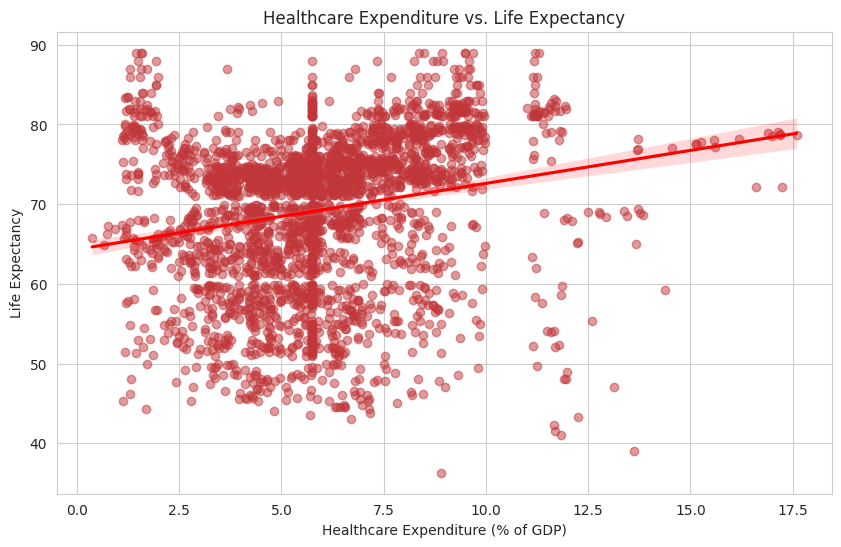

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Total expenditure", y="Life expectancy", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Healthcare Expenditure vs. Life Expectancy")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()


# 3️⃣ Health-Related Factors & Their Influence

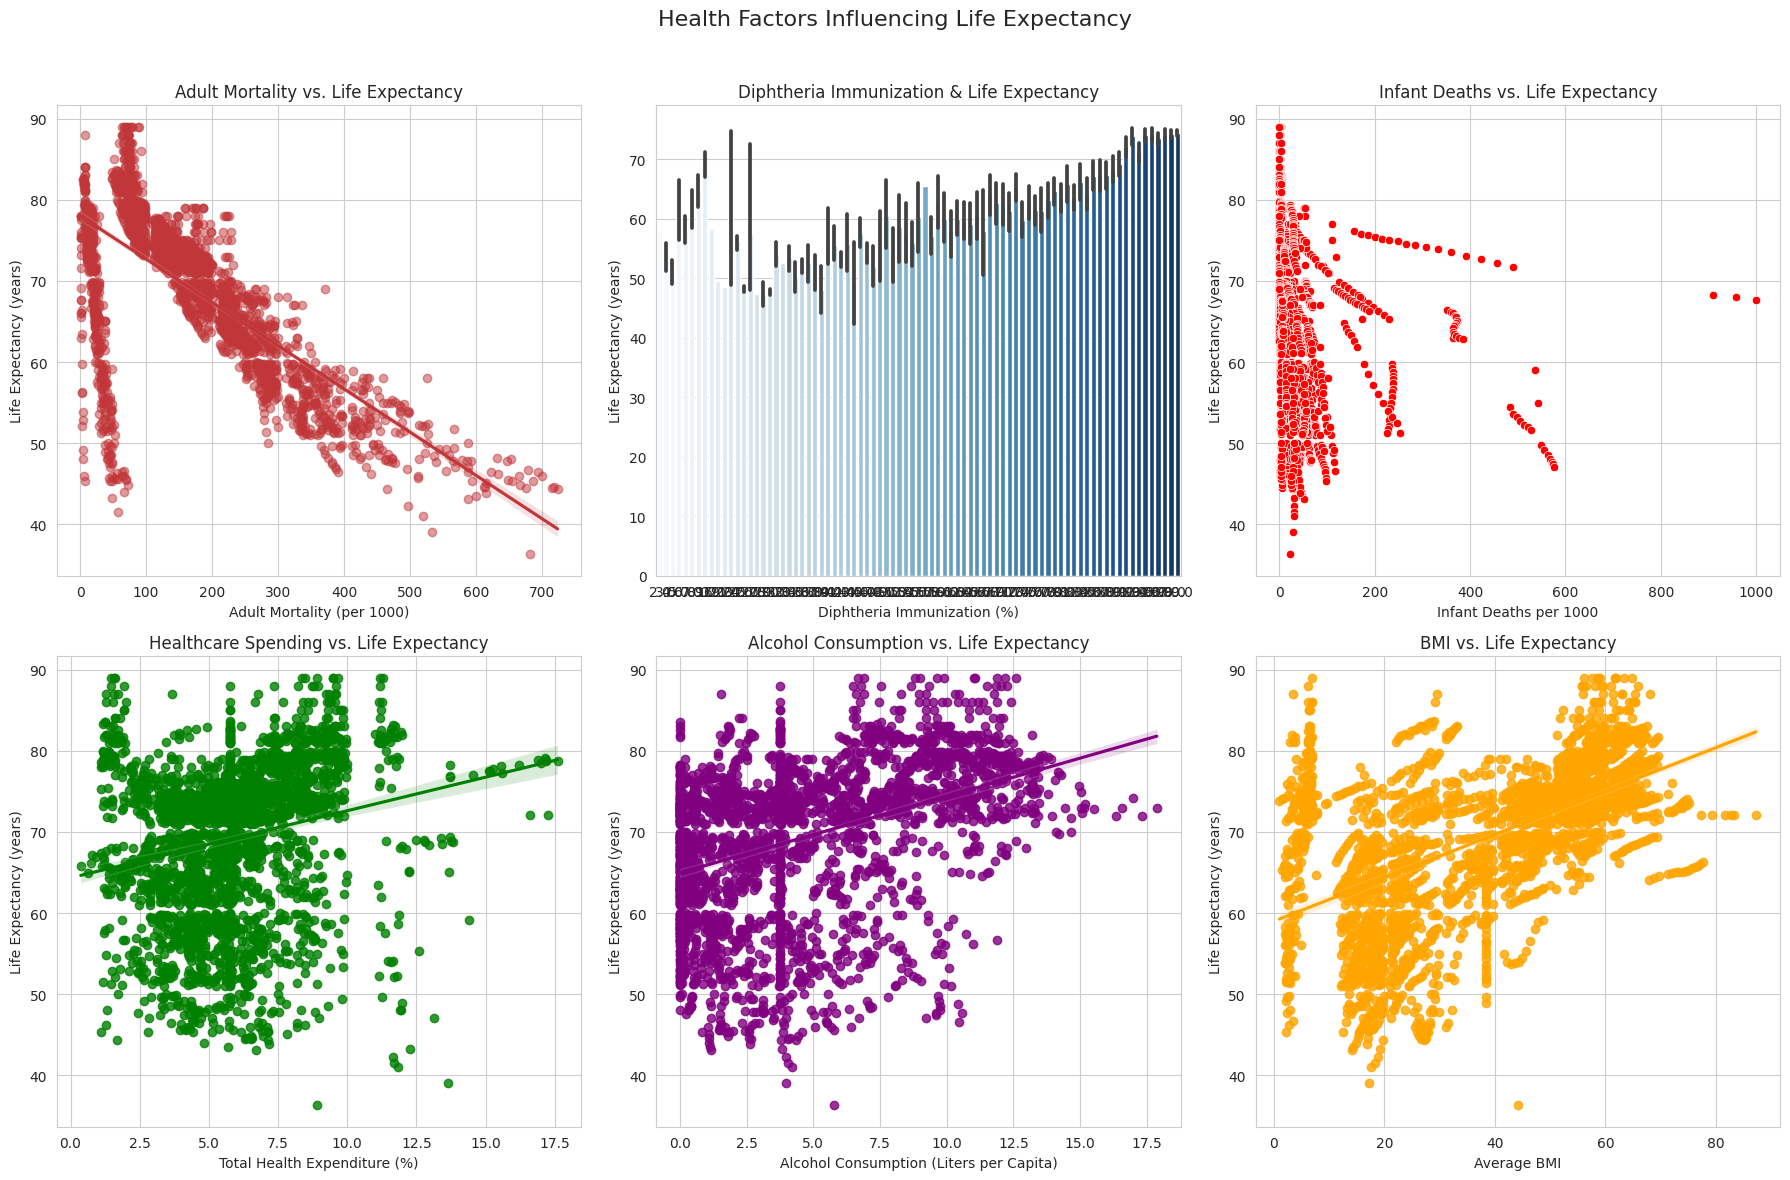

In [46]:
# Set up the figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
fig.suptitle("Health Factors Influencing Life Expectancy", fontsize=16)

# 1️⃣ Adult Mortality vs. Life Expectancy
sns.regplot(x=data["Adult Mortality"], y=data["Life expectancy"], scatter_kws={"alpha":0.5}, ax=axes[0,0])
axes[0,0].set_title("Adult Mortality vs. Life Expectancy")
axes[0,0].set_xlabel("Adult Mortality (per 1000)")
axes[0,0].set_ylabel("Life Expectancy (years)")

# 2️⃣ Immunization (Diphtheria) vs. Life Expectancy
sns.barplot(x=data["Diphtheria"], y=data["Life expectancy"], ax=axes[0,1], palette="Blues")
axes[0,1].set_title("Diphtheria Immunization & Life Expectancy")
axes[0,1].set_xlabel("Diphtheria Immunization (%)")
axes[0,1].set_ylabel("Life Expectancy (years)")

# 3️⃣ Infant Deaths vs. Life Expectancy
sns.scatterplot(x=data["infant deaths"], y=data["Life expectancy"], color='red', ax=axes[0,2])
axes[0,2].set_title("Infant Deaths vs. Life Expectancy")
axes[0,2].set_xlabel("Infant Deaths per 1000")
axes[0,2].set_ylabel("Life Expectancy (years)")

# 4️⃣ Healthcare Spending (Total Expenditure) vs. Life Expectancy
sns.regplot(x=data["Total expenditure"], y=data["Life expectancy"], color='green', ax=axes[1,0])
axes[1,0].set_title("Healthcare Spending vs. Life Expectancy")
axes[1,0].set_xlabel("Total Health Expenditure (%)")
axes[1,0].set_ylabel("Life Expectancy (years)")

# 5️⃣ Alcohol Consumption vs. Life Expectancy
sns.regplot(x=data["Alcohol"], y=data["Life expectancy"], color='purple', ax=axes[1,1])
axes[1,1].set_title("Alcohol Consumption vs. Life Expectancy")
axes[1,1].set_xlabel("Alcohol Consumption (Liters per Capita)")
axes[1,1].set_ylabel("Life Expectancy (years)")

# 6️⃣ BMI vs. Life Expectancy
sns.regplot(x=data["BMI"], y=data["Life expectancy"], color='orange', ax=axes[1,2])
axes[1,2].set_title("BMI vs. Life Expectancy")
axes[1,2].set_xlabel("Average BMI")
axes[1,2].set_ylabel("Life Expectancy (years)")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

# 4️⃣ Impact of Diseases & Health Policies

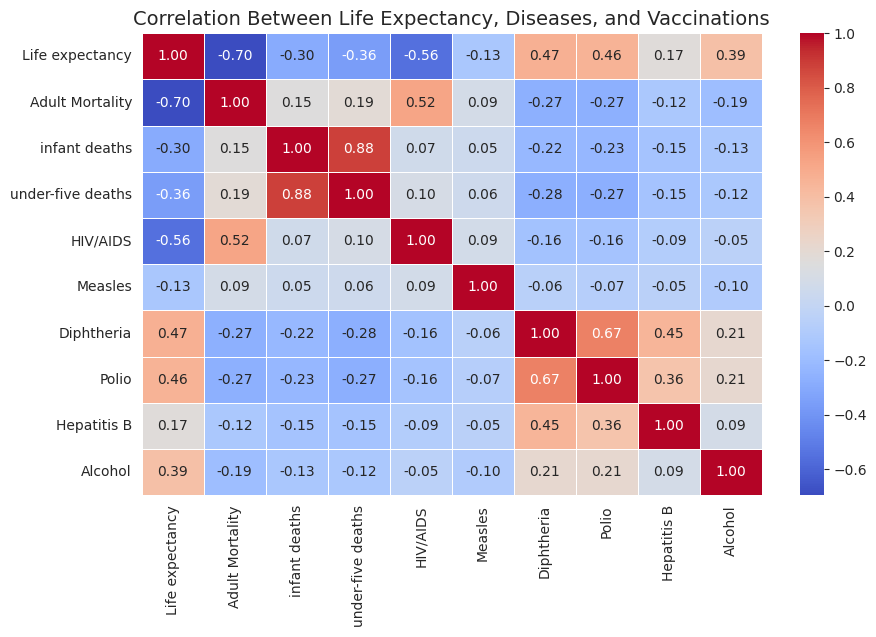

In [47]:
# Select only relevant columns
disease_vaccine_cols = ["Life expectancy", "Adult Mortality", "infant deaths", "under-five deaths",
                         "HIV/AIDS", "Measles", "Diphtheria", "Polio", "Hepatitis B","Alcohol"]

# Compute correlation matrix
corr_matrix = data[disease_vaccine_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Between Life Expectancy, Diseases, and Vaccinations", fontsize=14)
plt.show()
